In [3]:
columns

Index(['PartnerID', 'Sex', 'Age', 'LombardRating', 'LombardFirstDealDate',
       'CountryID', 'isValidPhone', 'isSMSEnable', 'isSMSBlack', 'isTrueEmail',
       'CntPledgeTicketGood', 'CntPledgeTicketBad', 'AllCntPledge',
       'GoodPercent', 'FirstIssueDate', 'LastIssueDate', 'DayWithUS',
       'ProshloDneyLast', 'ProshloDneyFirst', 'SredDneyMezdyZalog',
       'CntIssueDate', 'ClientUshel', 'CntTrasaction', 'CntTreasury',
       'minWeightGross', 'maxWeightGross', 'avgWeightGross', 'minWeightNet',
       'maxWeightNet', 'avgWeightNet', 'minWeightNet999', 'maxWeightNet999',
       'avgWeightNet999', 'minWeightNotBrilliant', 'maxWeightNotBrilliant',
       'avgWeightNotBrilliant', 'CntWeightNotBrilliant', 'minWeightNet999Calc',
       'maxWeightNet999Calc', 'avgWeightNet999Calc', 'minCost', 'maxCost',
       'avgCost', 'minMetal', 'maxMetal', 'avgMetal', 'minCostInsert',
       'maxCostInsert', 'avgCostInsert', 'CntCostInsert', 'avgProba',
       'PledgeTicketID', 'CntPromotionID', 

In [13]:
import numpy as np; import pandas as pd; import pyodbc; import datetime; import sklearn; import os; import math
from sklearn import feature_selection, linear_model, grid_search, cross_validation, metrics, ensemble, learning_curve 
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
import pickle
import xgboost as xgb
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
%pylab inline 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:90% !important;}</style>"))


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.cluster import KMeans


import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


import numpy as np; import pandas as pd; import pyodbc; import datetime; from dateutil import relativedelta
import sklearn; from sklearn import feature_selection, linear_model, grid_search, cross_validation, metrics, ensemble, learning_curve; from sklearn.feature_selection import chi2, f_classif, SelectKBest; from sklearn.preprocessing import StandardScaler
import os; import math; import pickle; import xgboost as xgb; os.environ['NLS_LANG'] = 'American_America.AL32UTF8'

Populating the interactive namespace from numpy and matplotlib


In [31]:
data1 = pd.read_csv('Data/columns.csv',sep=';')
columns = data1.columns
data = pd.read_csv('Data/3.csv',header = None,sep=';',decimal=',')
data.columns = columns


In [38]:
df_t=data[['Sex','Age','CntPledgeTicketGood','CntPledgeTicketBad','avgWeightGross','avgCost','CntPromotionID','AllCntPledge']].fillna(0)
df_t['Sex'].replace('F',0,inplace=True)
df_t['Sex'].replace('M',1,inplace=True)
df_t = df_t[df_t['Sex']!='U']
df_ots=df_t[['Sex','Age','CntPledgeTicketGood','CntPledgeTicketBad','avgWeightGross','avgCost','CntPromotionID','AllCntPledge']]

In [40]:

scaler = StandardScaler()
scaler.fit(df_t[['Sex','Age','CntPledgeTicketGood','CntPledgeTicketBad','avgWeightGross','avgCost','CntPromotionID','AllCntPledge']])
df_t[['Sex','Age','CntPledgeTicketGood','CntPledgeTicketBad','avgWeightGross','avgCost','CntPromotionID','AllCntPledge']] = scaler.transform(df_t[['Sex','Age','CntPledgeTicketGood','CntPledgeTicketBad','avgWeightGross','avgCost','CntPromotionID','AllCntPledge']])
kmeans = KMeans(n_clusters=5).fit(df_t)
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)



In [42]:
df_ots['pred']=df_t['pred']

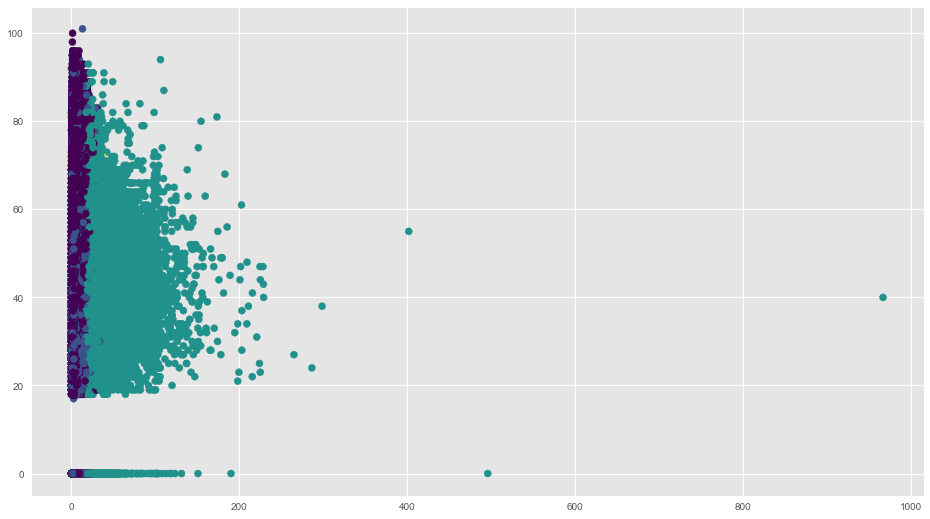

In [45]:
plt.scatter(df_ots['avgWeightGross'], df_ots['Age'], c=df_ots['pred'], cmap='viridis')